In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from autoencoder import VariationalConvAutoencoder, RegularConvAutoencoder, train_autoencoder, train_vae
from main import ta_dataset

import torch
from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt

device = torch.device("cuda")

In [7]:
train_ds, test_ds, form_lab_train, form_lab_test = ta_dataset(get_formation_labels=True)

Smaller class is class HS: 1728 vs 309


In [8]:
num_features = train_ds.X.shape[1]
proto_features = 32
do_batch_norm = True

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=64)

In [9]:
def tsne_X(X):
    tsne = TSNE(perplexity=30)
    transformed_X = tsne.fit_transform(X.reshape(X.shape[0], -1))
    return transformed_X

# Regular AE latent space visualization

In [ ]:
reg_ae = RegularConvAutoencoder(
    num_features=num_features,
    latent_features=proto_features,
    padding="same",
    do_max_pool=False,
    do_batch_norm=do_batch_norm,
    # num_conv_filters=4,
)

In [58]:
train_autoencoder(reg_ae, train_loader, test_loader, device=device, log=print, num_epochs=100)

epoch:   10/100 mse loss: 0.0654
epoch:   20/100 mse loss: 0.0219
epoch:   30/100 mse loss: 0.0129
epoch:   40/100 mse loss: 0.0444
epoch:   50/100 mse loss: 0.0169
epoch:   60/100 mse loss: 0.0210
epoch:   70/100 mse loss: 0.0189
epoch:   80/100 mse loss: 0.0244
epoch:   90/100 mse loss: 0.0288
epoch:  100/100 mse loss: 0.0319


In [69]:
reg_ae.eval()
encoded = reg_ae.encoder(torch.tensor(train_ds.X).to(device))
encoded = encoded.cpu().detach().numpy()
encoded = tsne_X(encoded)

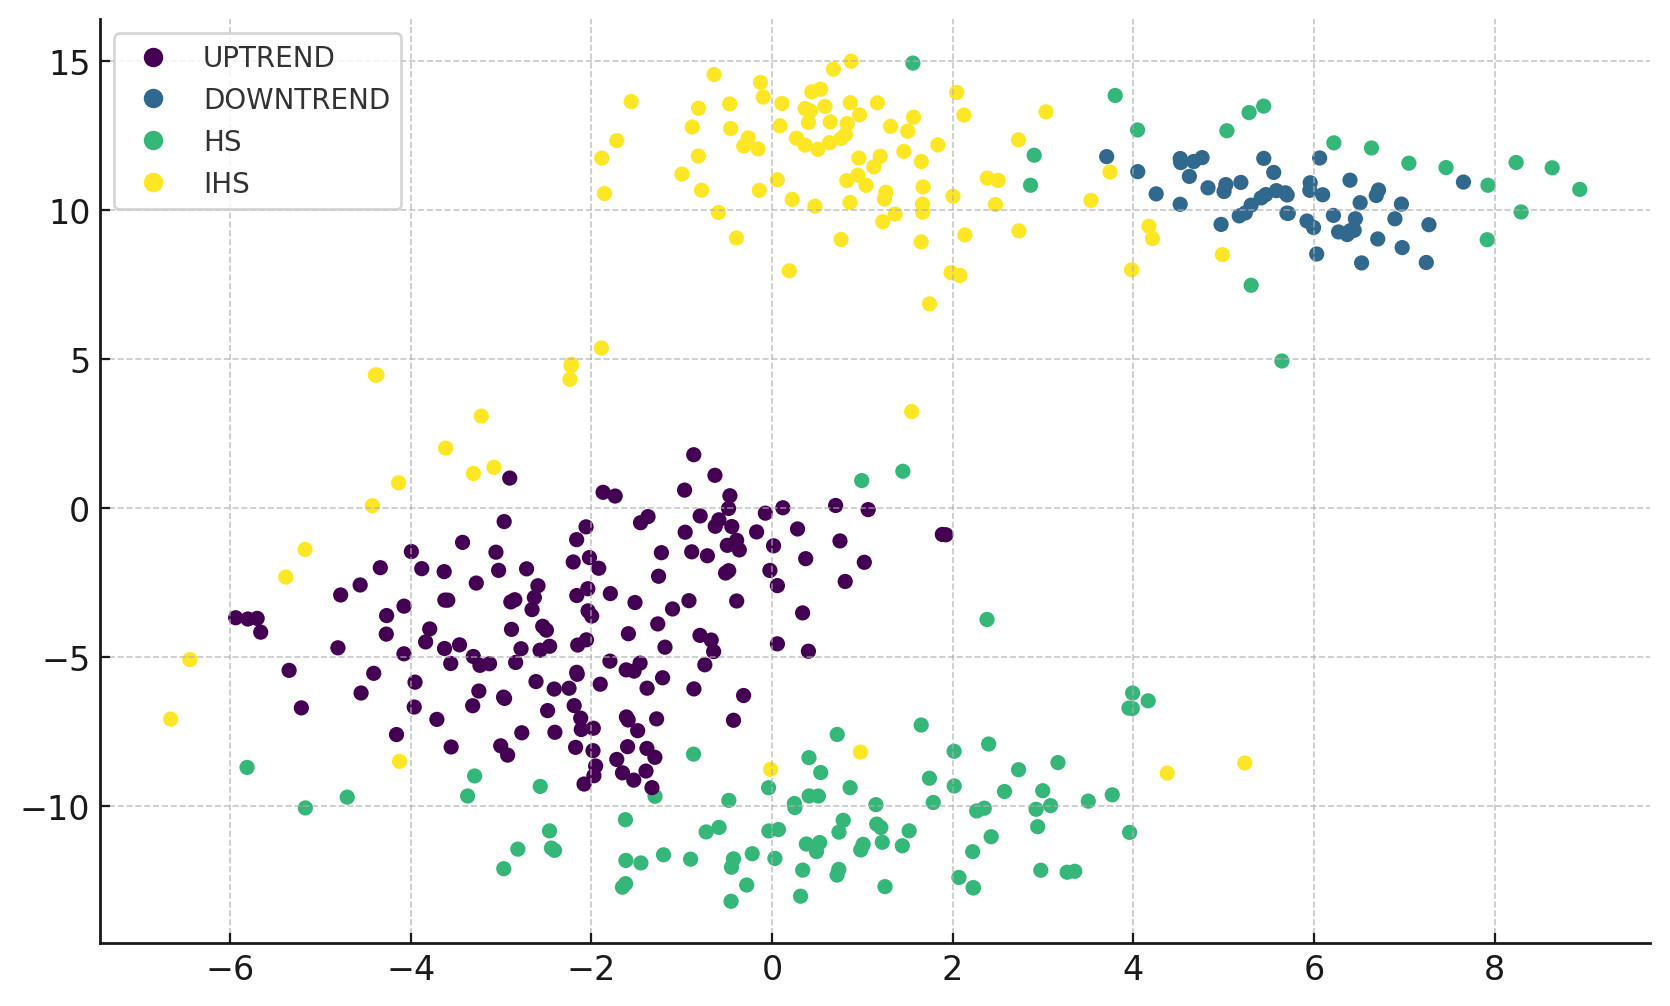

In [70]:
scatter = plt.scatter(encoded[:, 0], encoded[:, 1], c=form_lab_train, marker='o', alpha=1, s=20)

plt.legend(handles=scatter.legend_elements()[0], labels=['UPTREND', 'DOWNTREND', 'HS', 'IHS'])

# VAE latent space visualization

## Beta = 1.0

In [71]:
vae = VariationalConvAutoencoder(
    num_features=num_features,
    latent_features=proto_features,
    padding="same",
    do_max_pool=False,
    do_batch_norm=do_batch_norm,
    num_conv_filters=4,
)

In [72]:
train_vae(vae, train_loader, test_loader, device=device, log=print, num_epochs=100)

Epoch 10/100, VAE loss: 48.3898
Epoch 20/100, VAE loss: 42.1681
Epoch 30/100, VAE loss: 41.6358
Epoch 40/100, VAE loss: 41.2445
Epoch 50/100, VAE loss: 40.6496
Epoch 60/100, VAE loss: 38.8886
Epoch 70/100, VAE loss: 37.7675
Epoch 80/100, VAE loss: 37.6755
Epoch 90/100, VAE loss: 37.4311
Epoch 100/100, VAE loss: 37.9944


In [73]:
vae.eval()
encoded_mu, _ = vae.encode(torch.tensor(train_ds.X).to(device))
encoded_mu = encoded_mu.cpu().detach().numpy()
encoded_mu = tsne_X(encoded_mu)

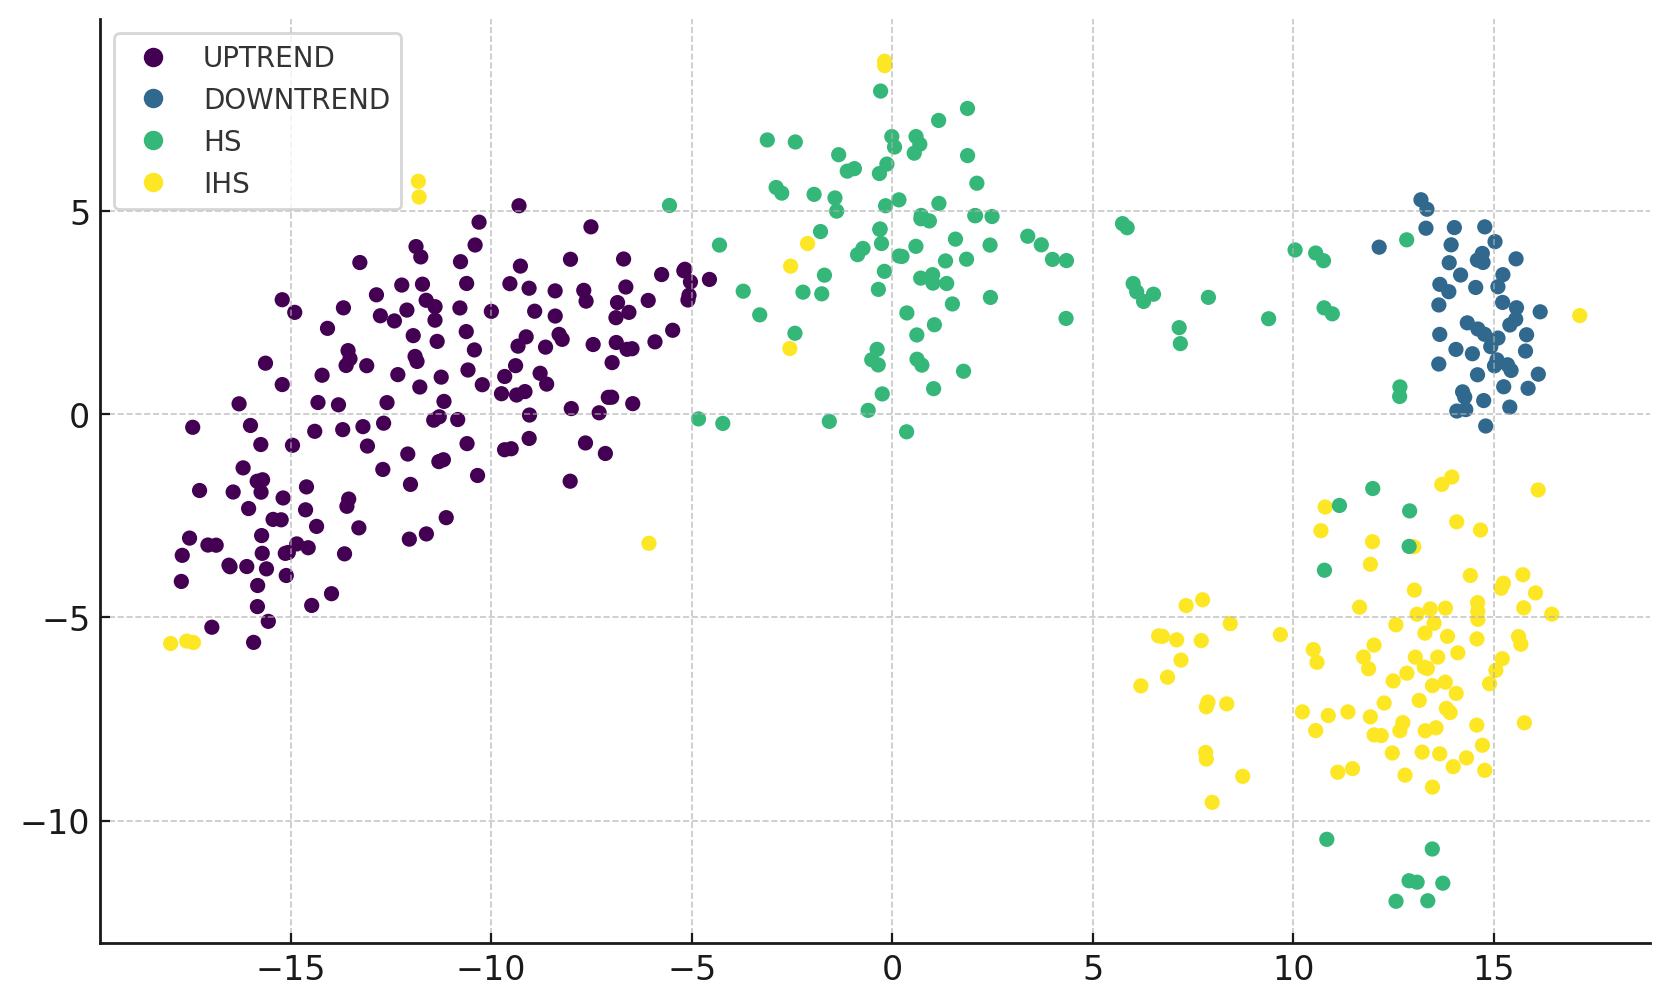

In [74]:
scatter = plt.scatter(encoded_mu[:, 0], encoded_mu[:, 1], c=form_lab_train, marker='o', alpha=1, s=20)

plt.legend(handles=scatter.legend_elements()[0], labels=['UPTREND', 'DOWNTREND', 'HS', 'IHS'])

## Beta = 2.0

In [75]:
vae = VariationalConvAutoencoder(
    num_features=num_features,
    latent_features=proto_features,
    padding="same",
    do_max_pool=False,
    do_batch_norm=do_batch_norm,
    num_conv_filters=4,
)

In [76]:
train_vae(vae, train_loader, test_loader, device=device, log=print, num_epochs=100, beta=2.0)

Epoch 10/100, VAE loss: 61.9228
Epoch 20/100, VAE loss: 55.1235
Epoch 30/100, VAE loss: 53.6152
Epoch 40/100, VAE loss: 52.4120
Epoch 50/100, VAE loss: 50.3984
Epoch 60/100, VAE loss: 51.1678
Epoch 70/100, VAE loss: 49.4998
Epoch 80/100, VAE loss: 50.9688
Epoch 90/100, VAE loss: 49.1331
Epoch 100/100, VAE loss: 49.8665


In [77]:
vae.eval()
encoded_mu, _ = vae.encode(torch.tensor(train_ds.X).to(device))
encoded_mu = encoded_mu.cpu().detach().numpy()
encoded_mu = tsne_X(encoded_mu)

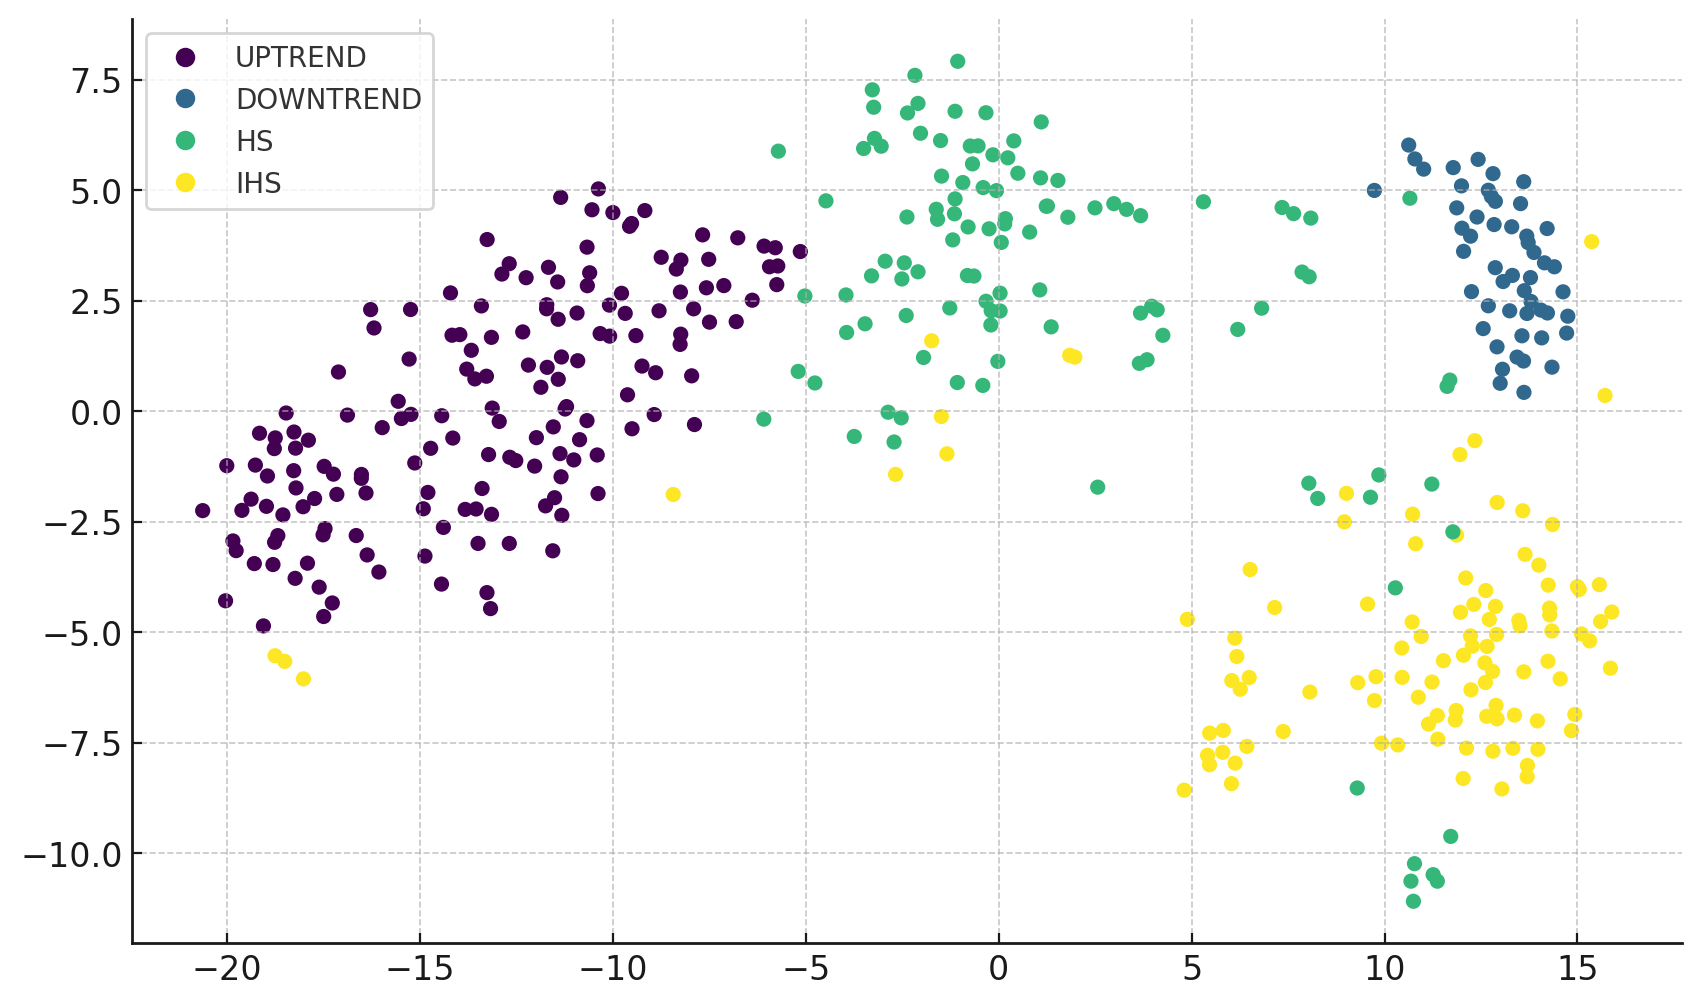

In [78]:
scatter = plt.scatter(encoded_mu[:, 0], encoded_mu[:, 1], c=form_lab_train, marker='o', alpha=1, s=20)

plt.legend(handles=scatter.legend_elements()[0], labels=['UPTREND', 'DOWNTREND', 'HS', 'IHS'])

## Beta = 10.0

In [79]:
vae = VariationalConvAutoencoder(
    num_features=num_features,
    latent_features=proto_features,
    padding="same",
    do_max_pool=False,
    do_batch_norm=do_batch_norm,
    num_conv_filters=4,
)

In [80]:
train_vae(vae, train_loader, test_loader, device=device, log=print, num_epochs=100, beta=10)

Epoch 10/100, VAE loss: 131.7868
Epoch 20/100, VAE loss: 90.4664
Epoch 30/100, VAE loss: 83.0905
Epoch 40/100, VAE loss: 79.3342
Epoch 50/100, VAE loss: 80.1478
Epoch 60/100, VAE loss: 80.9715
Epoch 70/100, VAE loss: 75.8648
Epoch 80/100, VAE loss: 78.5505
Epoch 90/100, VAE loss: 74.7629
Epoch 100/100, VAE loss: 75.9459


In [81]:
vae.eval()
encoded_mu, _ = vae.encode(torch.tensor(train_ds.X).to(device))
encoded_mu = encoded_mu.cpu().detach().numpy()
encoded_mu = tsne_X(encoded_mu)

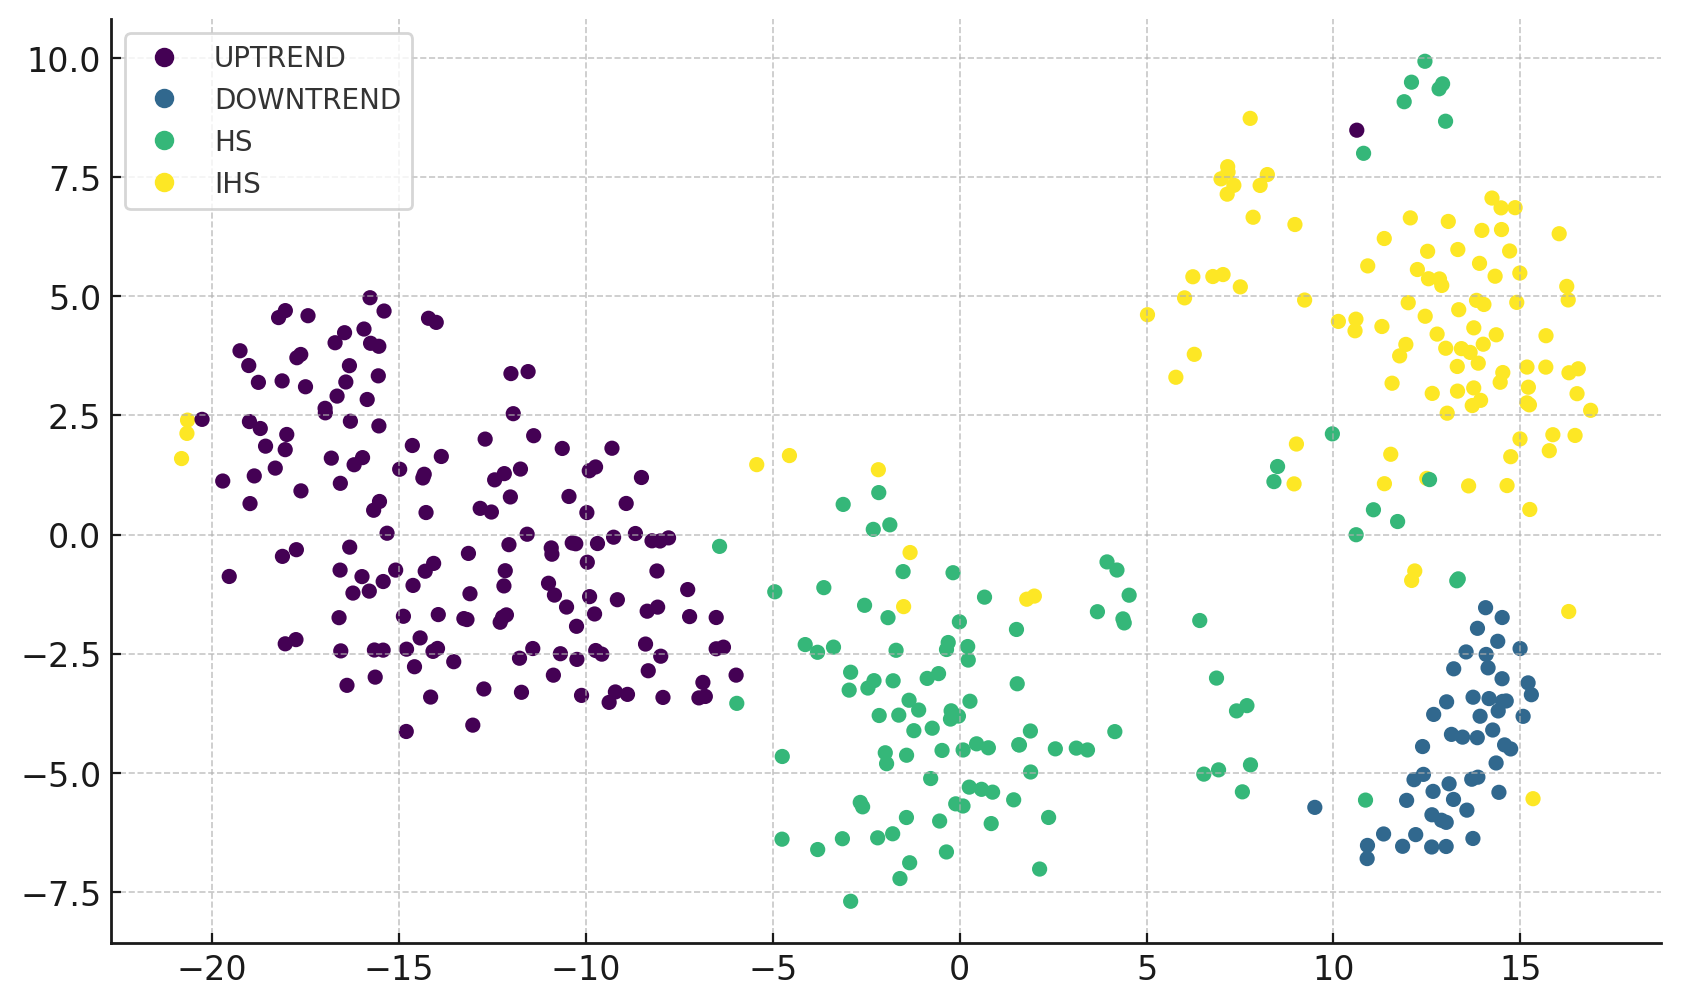

In [82]:
scatter = plt.scatter(encoded_mu[:, 0], encoded_mu[:, 1], c=form_lab_train, marker='o', alpha=1, s=20)

plt.legend(handles=scatter.legend_elements()[0], labels=['UPTREND', 'DOWNTREND', 'HS', 'IHS'])